![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 3 - Discriminative Classification </center>
### <center> Binary Classification Exercise (Breast Cancer)</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/03_DiscriminativeClassfication/MainBinaryClassificationExercise.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})

### Load breast cancer data:

In [2]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

print(dData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
#-- Normalize data:
mX = mX - np.mean(mX, axis=0)
mX = mX / np.std (mX, axis=0)

mX.shape, vY.shape

((569, 30), (569,))

In [4]:
vY[vY == 0] = -1
vY

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1

#### Define:
$$\tilde{\boldsymbol{X}}=\left[\begin{matrix}-1 & - & x_{1} & -\\
-1 & - & x_{2} & -\\
 & \vdots\\
-1 & - & x_{N} & -
\end{matrix}\right]\in\mathbb{R}^{N\times31}$$

In [5]:
#================================================================#
#-- Fill this:
N = len(mX)
mTildeX = np.concatenate([-np.ones((N, 1)), mX], axis=1)
#================================================================#

#### Sigmoid:
$$\sigma\left(\alpha\right)=2\frac{\exp\left(\alpha\right)}{1+\exp\left(\alpha\right)}-1$$
#### Sigmoid derivative:
$$\frac{\text{d}\sigma\left(\alpha\right)}{\text{d}\alpha}=2\frac{\exp\left(\alpha\right)}{\left(1+\exp\left(\alpha\right)\right)^{2}}$$
#### Objective gradient:
$$\nabla_{\tilde{\boldsymbol{w}}}\tilde{J}\left(\tilde{\boldsymbol{w}}\right)=\frac{1}{2N}\tilde{\boldsymbol{X}}^{T}\sigma'\left(\text{diag}\left(\tilde{\boldsymbol{X}}\tilde{\boldsymbol{w}}\right)\right)\left(\sigma\left(\tilde{\boldsymbol{X}}\tilde{\boldsymbol{w}}\right)-\boldsymbol{y}\right)$$

In [6]:
def sigmoid(α):
    return 2 * np.exp(α) / (np.exp(α) + 1) - 1

def Dsigmoid(α):
    return 2 * np.exp(α) / (np.exp(α) + 1)**2

def ComputeGradient(vTildeW):
    return (mTildeX.T * Dsigmoid(mTildeX @ vTildeW).T) @ (sigmoid(mTildeX @ vTildeW) - vY[:,None]) / (2*N)

#### Accuracy function:
$$\text{accuracy}=\frac{1}{N}\sum_{i=1}^{N}\mathbb{I}\left\{ \hat{y}_{i}=y_{i}\right\}$$
where
$$\hat{y}_{i}=\mathrm{sign}\left(\tilde{\boldsymbol{w}}^{T}\tilde{\boldsymbol{x}}_i\right)$$

In [7]:
def Accuracy(vW, mX, vY):
    vHatY    = np.sign(mX @ vW).squeeze()
    accuracy = np.mean(vHatY == vY)
    return accuracy

#### Apply gradient descent:
You should obtained at least 98% accuracy

<IPython.core.display.Javascript object>


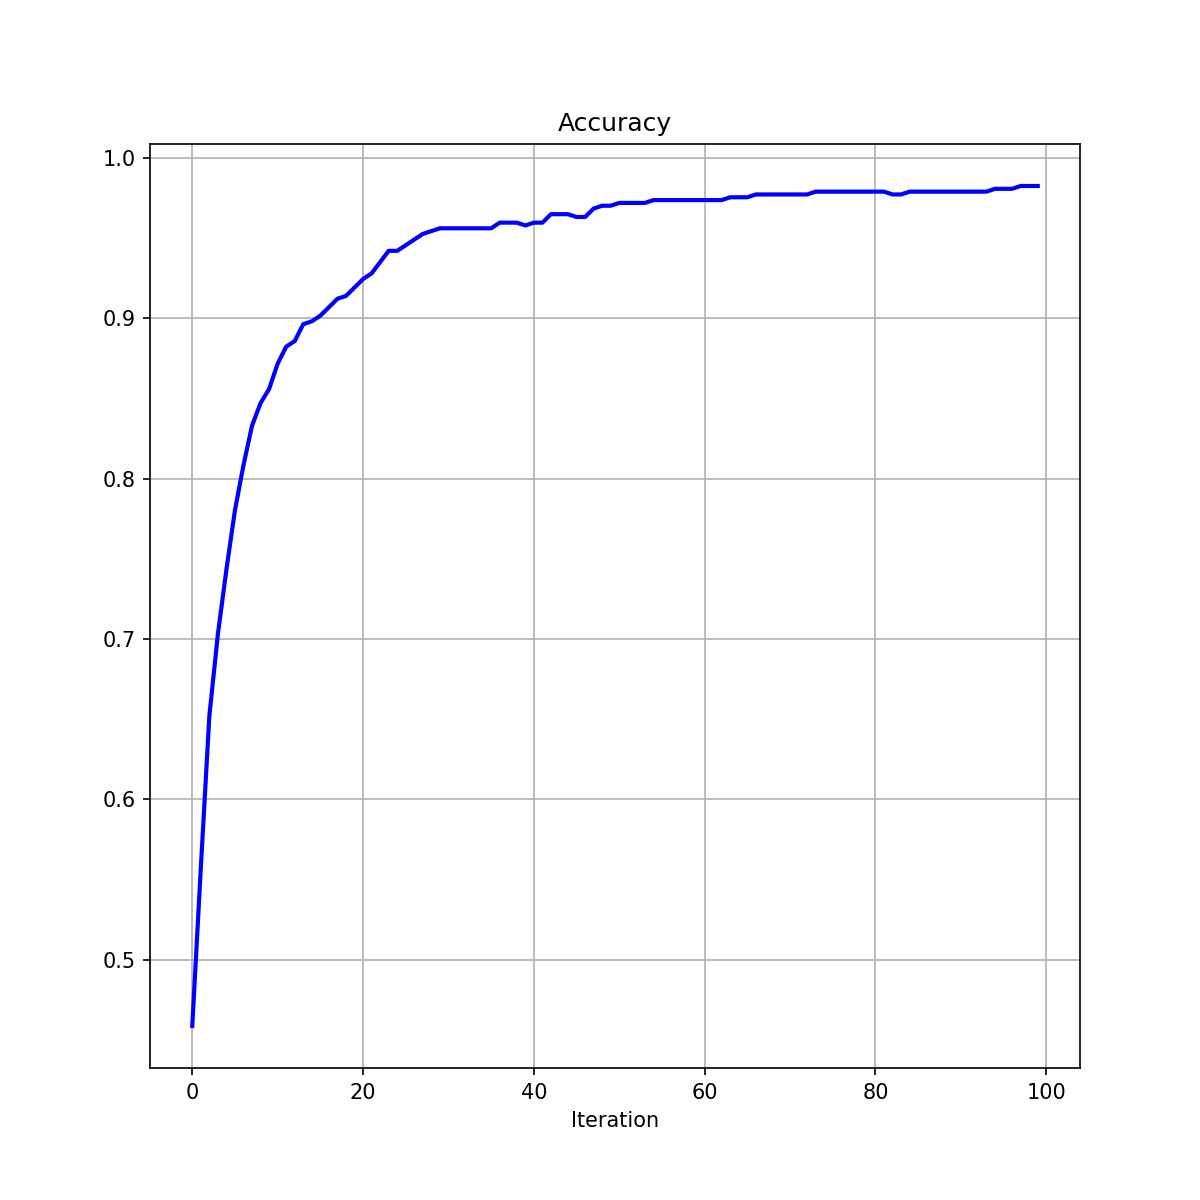

Accuracy: 0.98242530755711783

In [8]:
%matplotlib notebook

vTildeW   = np.random.randn(31, 1)
K         = 100
µ         = 2.0
vAccuracy = np.full(K, np.nan)

fig     = plt.figure(figsize=(8, 8))
plt.plot()
for ii in range(K):
    #-- Gradient descent step:
    vTildeW -= µ * ComputeGradient(vTildeW)
    
    #-- Plot:
    vAccuracy[ii] = Accuracy(vTildeW, mTildeX, vY)
    print(f'\rAccuracy: {vAccuracy[ii]}', end='')
    
    fig.axes[0].cla()
    plt.plot  (vAccuracy, 'b', lw=2)
    plt.title ('Accuracy')
    plt.xlabel('Iteration')
    plt.grid  (True)
    
    fig.canvas.draw()
    #plt.pause(1e-20)
        
plt.show()

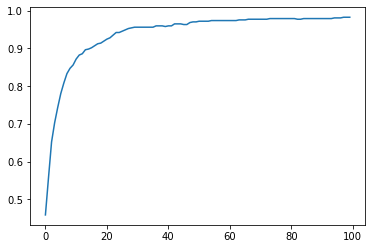

In [9]:
%matplotlib inline

plt.figure()
plt.plot(vAccuracy)
plt.show()